# Monte carlo simulation

In [1]:
import numpy as np 
import polars as pl 
from polars import col 
import matplotlib.pyplot as plt 
import seaborn as sb 

%load_ext autoreload
%autoreload 2
plt.style.use("../matplotlibrc")

In [2]:
from findec.returns import draw_lognormal_return
from findec.utility import composite_crra_utility

In [3]:
from findec.dataclasses import Preferences
preferences = Preferences()

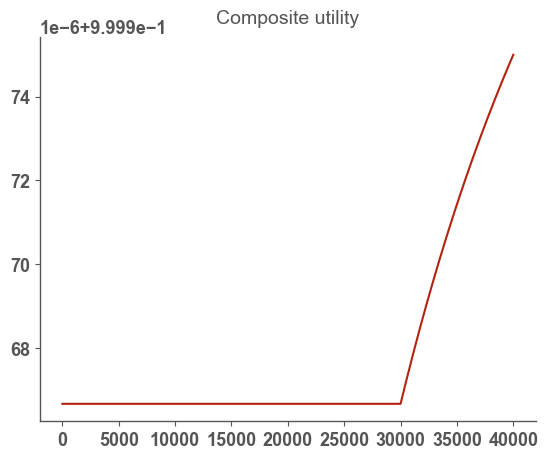

In [4]:
w = np.linspace(0, 40e3, 1000)
u = np.array([composite_crra_utility(wi, pref=preferences) for wi in w])
fig, ax = plt.subplots()
ax.plot(w, u)
ax.set_title("Composite utility");

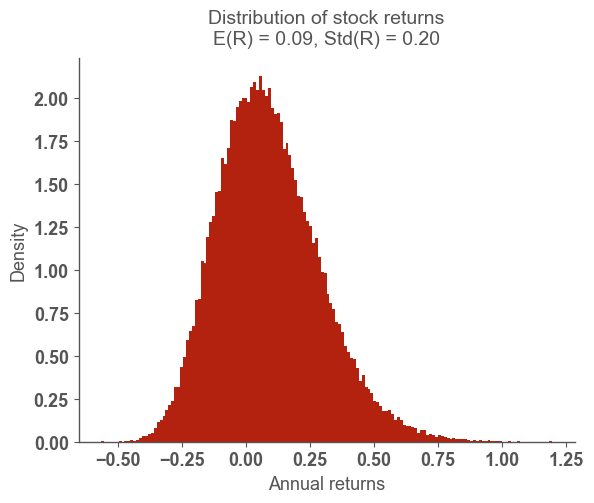

In [5]:
stock_returns = draw_lognormal_return(mean_return=0.09, stdev=0.2, n_sims=100_000)
fig, ax = plt.subplots()
ax.hist(stock_returns, bins="auto", density=True)
stock_returns_mean = stock_returns.mean()
stock_returns_std = stock_returns.std()
ax.set_xlabel("Annual returns")
ax.set_ylabel("Density")
ax.set_title(
    f"Distribution of stock returns\nE(R) = {stock_returns_mean:.2f}, Std(R) = {stock_returns_std:.2f}"
);

In [6]:
from findec.simulate import simulate_life_paths
from findec.dataclasses import Assets

In [7]:
initial_assets = Assets(tax_free=400_000.0, taxable=600_000.0, tax_rate=0.2)

sims = simulate_life_paths(    
    n_sims=10,
    expected_return_risky=0.09,
    std_dev_return_risky=0.20,
    risk_free_rate=0.04,
    pref=preferences,
    a=initial_assets,
    social_security=30_000.0,
    time_horizon=20,
    starting_age=65,
    is_male=False,
    rng_seed=45,
    with_survival_probabilities=False,
)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 155.39it/s]


In [8]:
sims

age,alive,tax_free,taxable,risky_return,consumption,consumption_fraction,total_utility,run_number
i64,bool,f64,f64,f64,f64,f64,f64,i64
65,true,400000.0,600000.0,null,null,null,0.0,0
66,true,425314.96882,590838.574976,0.07726,59462.756185,0.072164,0.980376,0
67,true,464685.915055,592892.224045,0.12411,62543.756726,0.074731,1.941529,0
68,true,470993.870953,545811.263521,-0.002281,67512.748346,0.077595,2.883837,0
69,true,487766.203041,508711.349137,0.032977,67673.97313,0.08081,3.807669,0
…,…,…,…,…,…,…,…,…
81,true,0.0,169023.017752,-0.020255,38772.790674,0.223249,12.120654,9
82,true,0.0,136921.804186,-0.107665,43637.18326,0.274071,12.8348,9
83,true,0.0,113779.618057,0.077038,47920.374293,0.358853,13.534945,9


In [ ]:
sims["run_number"].value_counts()

run_number,count
i64,u32
0,21
1,21
2,21
3,21
4,21
5,21
6,21
7,21
8,21
